<a href="https://colab.research.google.com/github/priyanka4678/Assignment_on_python_for_DSA/blob/main/Priyanka_Kumari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading the data set and making 'PassengerId' as index column.**

In [5]:
data=pd.read_csv('/titanic_dataset.csv',index_col='PassengerId')

In [18]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S


## **Cheking the Basic Details of the dataset**

In [11]:
data.shape

(891, 11)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## **Filling the Missing values in all the columns and Handling the Outliers**

In [13]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [17]:
data['Age'].isna().sum()

0

In [28]:
num_cols=data[['Cabin','Embarked']]

In [58]:
for i in num_cols:
  num_cols=num_cols.fillna(num_cols.mode().iloc[:0])

In [59]:
num_cols.isna().sum()

Cabin       891
Embarked      0
dtype: int64

In [60]:
data['Cabin']=data['Cabin'].fillna('Unknown')[:10]

In [62]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [70]:
Q2=np.percentile(data['Pclass'],50)

In [71]:
Q2

3.0

In [65]:
Q3=np.percentile(data['Pclass'],75)

In [72]:
Q3

3.0

In [66]:
IQR = Q3 - Q1

In [67]:
low_limit=Q1-1.5*IQR
upr_lim=Q3+1.5*IQR

In [68]:
outlier=[]
for x in data['Pclass']:
  if((x>upr_lim) or (x<low_limit)):
    outlier.append(x)

In [69]:
outlier

[]

In [73]:
Q2=np.percentile(data['Age'],50)

In [78]:
Q3=np.percentile(data['Age'],75)

In [79]:
IQR = Q3 - Q1

In [80]:
outlier=[]
for x in data['Age']:
  if((x>upr_lim) or (x<low_limit)):
    outlier.append(x)

In [81]:
outlier

[22.0,
 38.0,
 26.0,
 35.0,
 35.0,
 28.0,
 54.0,
 27.0,
 14.0,
 58.0,
 20.0,
 39.0,
 14.0,
 55.0,
 28.0,
 31.0,
 28.0,
 35.0,
 34.0,
 15.0,
 28.0,
 8.0,
 38.0,
 28.0,
 19.0,
 28.0,
 28.0,
 40.0,
 28.0,
 28.0,
 66.0,
 28.0,
 42.0,
 28.0,
 21.0,
 18.0,
 14.0,
 40.0,
 27.0,
 28.0,
 19.0,
 28.0,
 28.0,
 28.0,
 28.0,
 18.0,
 7.0,
 21.0,
 49.0,
 29.0,
 65.0,
 28.0,
 21.0,
 28.5,
 5.0,
 11.0,
 22.0,
 38.0,
 45.0,
 28.0,
 28.0,
 29.0,
 19.0,
 17.0,
 26.0,
 32.0,
 16.0,
 21.0,
 26.0,
 32.0,
 25.0,
 28.0,
 28.0,
 30.0,
 22.0,
 29.0,
 28.0,
 28.0,
 17.0,
 33.0,
 16.0,
 28.0,
 23.0,
 24.0,
 29.0,
 20.0,
 46.0,
 26.0,
 59.0,
 28.0,
 71.0,
 23.0,
 34.0,
 34.0,
 28.0,
 28.0,
 21.0,
 33.0,
 37.0,
 28.0,
 21.0,
 28.0,
 38.0,
 28.0,
 47.0,
 14.5,
 22.0,
 20.0,
 17.0,
 21.0,
 70.5,
 29.0,
 24.0,
 21.0,
 28.0,
 32.5,
 32.5,
 54.0,
 12.0,
 28.0,
 24.0,
 28.0,
 45.0,
 33.0,
 20.0,
 47.0,
 29.0,
 25.0,
 23.0,
 19.0,
 37.0,
 16.0,
 24.0,
 28.0,
 22.0,
 24.0,
 19.0,
 18.0,
 19.0,
 27.0,
 9.0,
 36.5,
 42.0,
 51

Text(0.5, 1.0, 'box plot for Age')

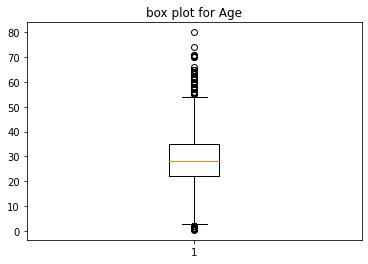

In [85]:
plt.boxplot(data['Age'])
plt.title('box plot for Age')

In [82]:
ind=data['Age']>upr_lim
data.loc[ind].index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   9,  10,  12,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name='PassengerId', length=851)